In [1]:
# === 1. Import Required Libraries ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [4]:
# === 2. Load and Format the Data ===
file_path = r"/Users/shrinithask/Desktop/VCU/Stastical analysis/Assignments/Data/pink_sheet.xlsx"  # Replace with your actual file path if needed
df = pd.read_excel(file_path, sheet_name="Monthly Prices", skiprows=5)


In [5]:
# Extract date and gold price columns
df_gold = df[['Unnamed: 0', '($/troy oz)']]
df_gold.columns = ['Date', 'Gold_Price']
df_gold = df_gold[pd.to_numeric(df_gold['Gold_Price'], errors='coerce').notnull()]
df_gold['Gold_Price'] = df_gold['Gold_Price'].astype(float)

In [6]:
# Convert date in 'YYYYMmm' format to datetime
df_gold['Date'] = pd.to_datetime(df_gold['Date'], format='%YM%m')
df_gold.set_index('Date', inplace=True)


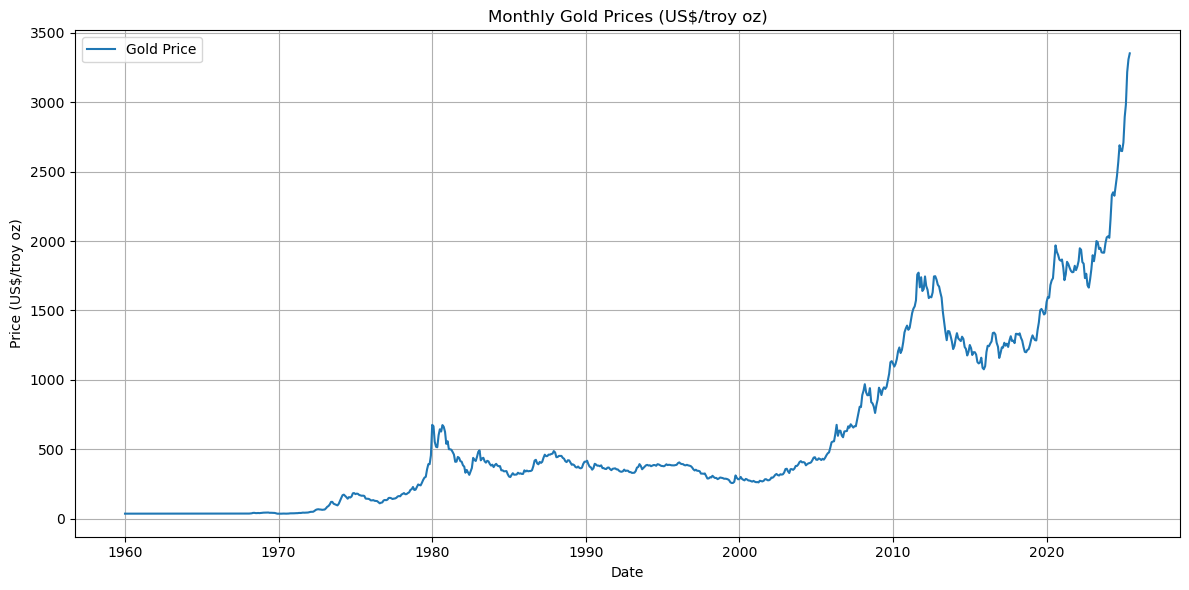

In [7]:
# === 3. Plot Full Time Series ===
plt.figure(figsize=(12, 6))
plt.plot(df_gold.index, df_gold['Gold_Price'], label="Gold Price")
plt.title("Monthly Gold Prices (US$/troy oz)")
plt.xlabel("Date")
plt.ylabel("Price (US$/troy oz)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# === 4. Train-Test Split ===
train = df_gold[:-12]
test = df_gold[-12:]

In [9]:
# === 5. Fit SARIMA Model ===
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

# === 6. Forecast for Next 12 Months ===
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()
forecast_mean.index = pd.to_datetime(forecast_mean.index)
lower_ci = forecast_ci.iloc[:, 0].astype(float).to_numpy()
upper_ci = forecast_ci.iloc[:, 1].astype(float).to_numpy()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


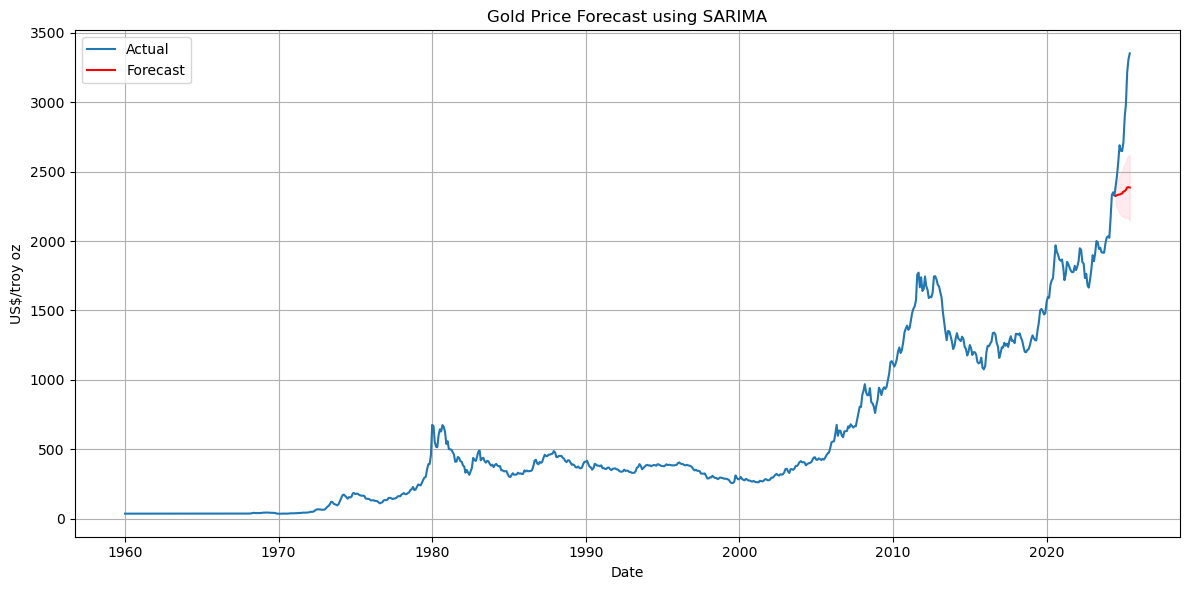

In [10]:
# === 7. Plot Forecast ===
x_dates = forecast_mean.index.to_numpy()
forecast_values = forecast_mean.to_numpy()
plt.figure(figsize=(12,6))
plt.plot(df_gold.index, df_gold['Gold_Price'], label="Actual")
plt.plot(x_dates, forecast_values, label="Forecast", color='red')
plt.fill_between(x_dates, lower_ci, upper_ci, color='pink', alpha=0.3)
plt.title("Gold Price Forecast using SARIMA")
plt.xlabel("Date")
plt.ylabel("US$/troy oz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
# === 8. Evaluate the Model ===
rmse = np.sqrt(mean_squared_error(test, forecast_mean))
mae = mean_absolute_error(test, forecast_mean)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 552.16
MAE: 470.11
